# Pandas sales analysis

## Objective

- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- What is the city that receives the most orders?


<h4> IMPORTING REQUIRED LIBRARIES

In [3]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os
import plotly.graph_objs as go
from plotly.offline import iplot

In [4]:
# Importing dataset
df = pd.read_csv('Sales Data.csv')

In [5]:
# First five rows of the dataset
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [6]:
# Last five rows of the dataset
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [7]:
# Shape of the dataset
df.shape

(185950, 11)

In [8]:
# Columns present in the dataset
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [9]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [10]:
# Checking missing values
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [11]:
# Generating descriptive statistics summary
df.describe().round()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.0,185950.0,185950.0,185950.0,185950.0,185950.0,185950.0
mean,8340.0,230418.0,1.0,184.0,7.0,185.0,14.0
std,5451.0,51513.0,0.0,333.0,4.0,333.0,5.0
min,0.0,141234.0,1.0,3.0,1.0,3.0,0.0
25%,3894.0,185831.0,1.0,12.0,4.0,12.0,11.0
50%,7786.0,230368.0,1.0,15.0,7.0,15.0,15.0
75%,11872.0,275036.0,1.0,150.0,10.0,150.0,19.0
max,25116.0,319670.0,9.0,1700.0,12.0,3400.0,23.0


- <h4> WHAT IS THE OVERALL SALES TREND?

In [17]:
# Getting month year from order_date
df['Month'] = df['Order Date'].apply(lambda x: pd.to_datetime(x).strftime('%B %Y'))

In [18]:
# grouping month_year by sales
df_temp = df.groupby('Month').sum()['Sales'].reset_index()

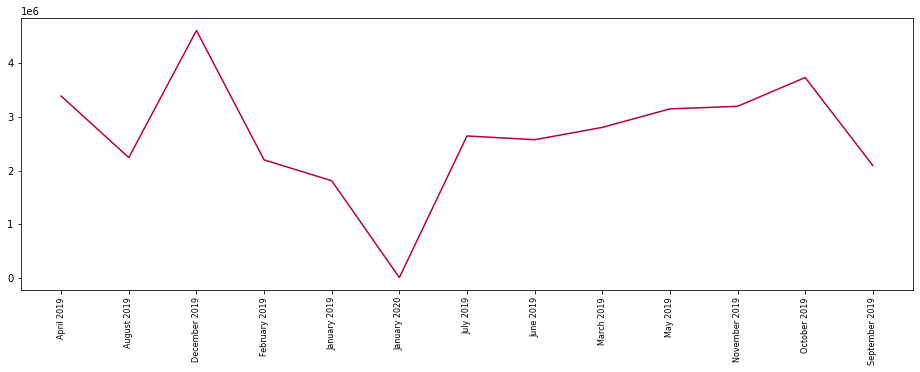

In [19]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['Month'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

- <h4> WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [20]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('Product').sum()['Sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:25]

,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


- <h4> WHICH ARE THE TOP 10 PRODUCTS BY QUANTITY ORDERED?
- <h4> WHICH ARE THE MOST SELLING PRODUCTS?

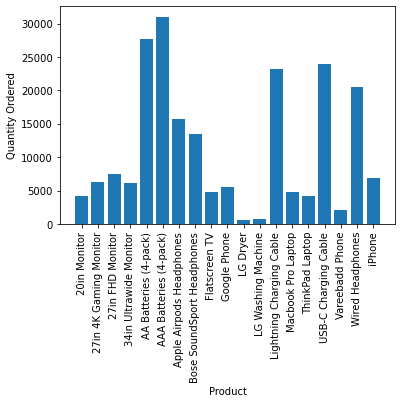

In [21]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation ='vertical', size=10)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

In [22]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product').sum()['Quantity Ordered'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Quantity Ordered'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


C:\Users\user\AppData\Local\Temp\ipykernel_13440\2075275670.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\user\AppData\Local\Temp\ipykernel_13440\2075275670.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



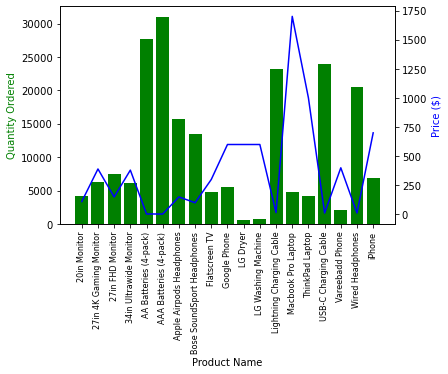

In [23]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

- <h4> WHAT IS THE CITY THAT RECIEVES THE MOST ORDERS?

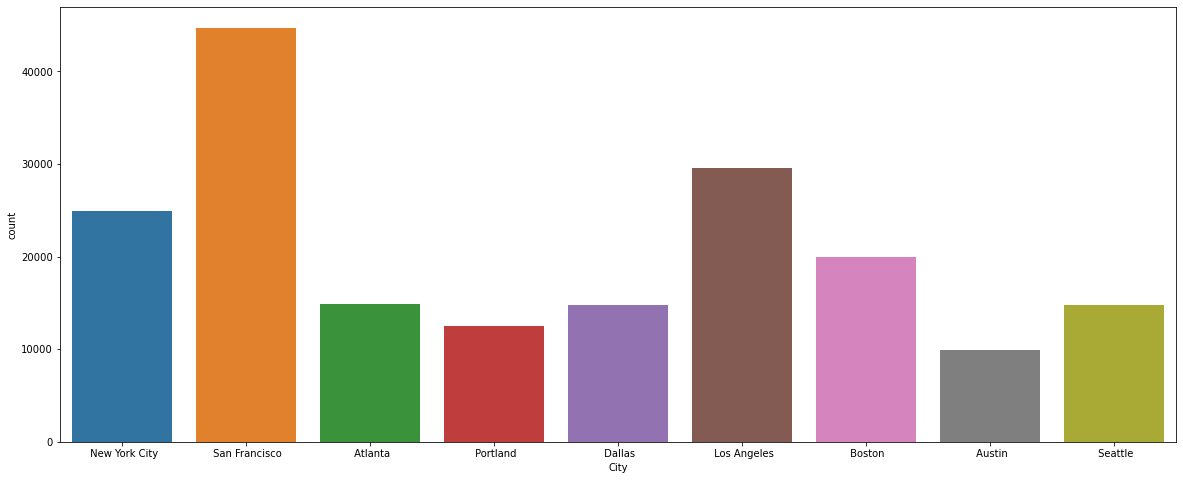

In [24]:
# Setting the figure size
plt.figure(figsize=(20, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='City', data=df)

# Display the figure
plt.show()